In [7]:
import matplotlib
import pandas as pd
from matplotlib import pyplot as plt
import igraph as ig
import geopandas as gpd
from tqdm import tqdm
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as mcolors

In [4]:
# filtered_problem_graph_file = '/home/rico/Documents/courses/6.C571/Final Project/ernp/data/Boston/resulting_graph/metro_only_problem_graph.gml'
problem_graph_file = '/home/rico/Documents/courses/6.C571/Final Project/ernp/data/Boston/resulting_graph/Boston_problem_graph_2024-11-21_reduced.gml'
complete_census_file = '/home/rico/Documents/courses/6.C571/Final Project/ernp/data/Boston/complete_census_2022.parquet'
crs = "EPSG:4326"

In [5]:
g : ig.Graph = ig.read(problem_graph_file)

In [8]:
complete_census = gpd.read_parquet(complete_census_file)
complete_census = complete_census.to_crs(crs)
lodes_od_matrix = pd.read_csv('/home/rico/Documents/courses/6.C571/Final Project/ernp/data/Boston/MA_bg_od_subset_2021.csv')

In [31]:
lodes_od_matrix.size

1079521

In [13]:
g.vs[0]

igraph.Vertex(<igraph.Graph object at 0x7fdcca5df040>, 0, {'id': 0.0, 'x': -71.082754, 'y': 42.330957, 'uniqueagencyid': 'mbta', 'routetype': 3.0, 'stopid': '1', 'name': 'Washington St opp Ruggles St', 'color': 'BLUE', 'type': 'pt_node', 'GEOID20': 'None', 'MBTACommunityType': 'None', 'Households': nan, 'HouseholdsLessthan25000': nan, 'Households25000to49999': nan, 'Households50000to74999': nan, 'Households75000to99999': nan, 'Households100000orMore': nan, 'TotalPopulation': nan, 'TotalPopulationMale': nan, 'TotalPopulationMaleUnder18Years': nan, 'TotalPopulationMale18to34Years': nan, 'TotalPopulationMale35to64Years': nan, 'TotalPopulationMale65YearsandOver': nan, 'TotalPopulationFemale': nan, 'TotalPopulationFemaleUnder18Years': nan, 'TotalPopulationFemale18to34Years': nan, 'TotalPopulationFemale35to64Years': nan, 'TotalPopulationFemale65YearsandOver': nan, 'TotalPopulationHispanicorLatino': nan, 'TotalPopulationNotHispanicorLatino': nan, 'TotalPopulationNotHispanicorLatinoWhiteAlone'

In [28]:
list(g.vs.select(type='rc_node', GEOID20_in=lodes_od_matrix['h_bg'].astype(str).to_list()))

[igraph.Vertex(<igraph.Graph object at 0x7fdcca5df040>, 2989, {'id': 2995.0, 'x': -70.9886912, 'y': 42.2583235, 'uniqueagencyid': 'None', 'routetype': nan, 'stopid': 'None', 'name': 'Quincy (250214177022)', 'color': 'red', 'type': 'rc_node', 'GEOID20': '250214177022', 'MBTACommunityType': 'subway or light rail', 'Households': 385.0, 'HouseholdsLessthan25000': 120.0, 'Households25000to49999': 12.0, 'Households50000to74999': 74.0, 'Households75000to99999': 35.0, 'Households100000orMore': 144.0, 'TotalPopulation': 1017.0, 'TotalPopulationMale': 481.0, 'TotalPopulationMaleUnder18Years': 45.0, 'TotalPopulationMale18to34Years': 218.0, 'TotalPopulationMale35to64Years': 167.0, 'TotalPopulationMale65YearsandOver': 51.0, 'TotalPopulationFemale': 536.0, 'TotalPopulationFemaleUnder18Years': 37.0, 'TotalPopulationFemale18to34Years': 201.0, 'TotalPopulationFemale35to64Years': 259.0, 'TotalPopulationFemale65YearsandOver': 39.0, 'TotalPopulationHispanicorLatino': 136.0, 'TotalPopulationNotHispanicorLa

In [22]:
g.vs.select(type='rc_node')[0]

igraph.Vertex(<igraph.Graph object at 0x7fdcca5df040>, 2989, {'id': 2995.0, 'x': -70.9886912, 'y': 42.2583235, 'uniqueagencyid': 'None', 'routetype': nan, 'stopid': 'None', 'name': 'Quincy (250214177022)', 'color': 'red', 'type': 'rc_node', 'GEOID20': '250214177022', 'MBTACommunityType': 'subway or light rail', 'Households': 385.0, 'HouseholdsLessthan25000': 120.0, 'Households25000to49999': 12.0, 'Households50000to74999': 74.0, 'Households75000to99999': 35.0, 'Households100000orMore': 144.0, 'TotalPopulation': 1017.0, 'TotalPopulationMale': 481.0, 'TotalPopulationMaleUnder18Years': 45.0, 'TotalPopulationMale18to34Years': 218.0, 'TotalPopulationMale35to64Years': 167.0, 'TotalPopulationMale65YearsandOver': 51.0, 'TotalPopulationFemale': 536.0, 'TotalPopulationFemaleUnder18Years': 37.0, 'TotalPopulationFemale18to34Years': 201.0, 'TotalPopulationFemale35to64Years': 259.0, 'TotalPopulationFemale65YearsandOver': 39.0, 'TotalPopulationHispanicorLatino': 136.0, 'TotalPopulationNotHispanicorLat

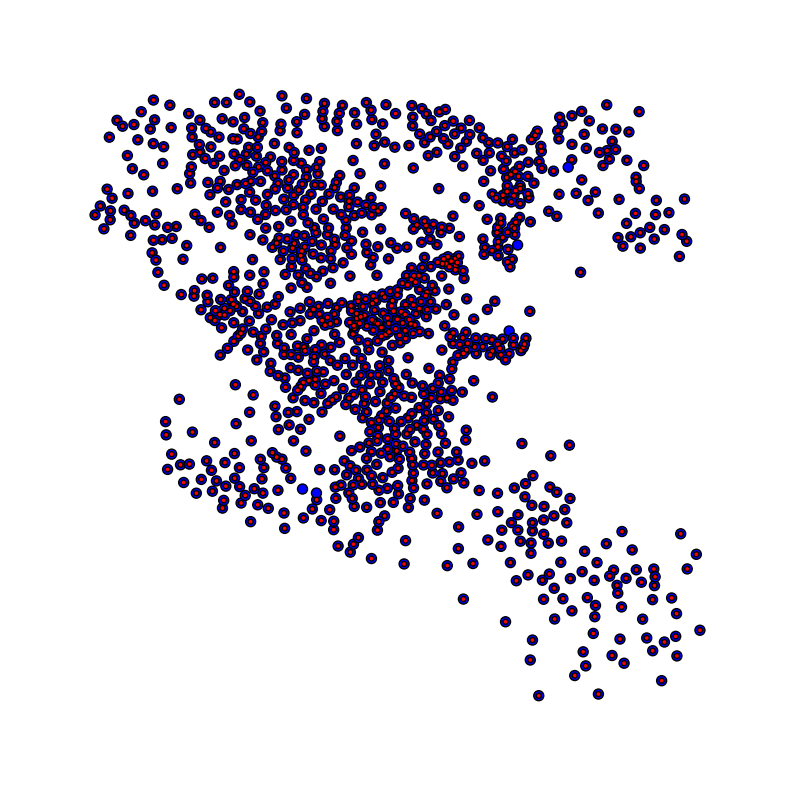

In [30]:
# Filter vertices with type 'rc_node'
rc_nodes = g.vs.select(type='rc_node')
rc_nodes_with_lodes = g.vs.select(type='rc_node', GEOID20_in=lodes_od_matrix['h_bg'].astype(str).to_list())

# Plot only the filtered vertices
fig, ax = plt.subplots(figsize=(10, 10))

ig.plot(
    g.subgraph(rc_nodes),  # Subgraph of only 'rc_node' vertices
    target=ax,
    vertex_size=10,
    vertex_color='blue',
    vertex_label=None,  # Optional: Label the filtered vertices
    edge_color=None,  # Hide edges (since we only want vertices)
    edge_width=0
)

ig.plot(
    g.subgraph(rc_nodes_with_lodes),  # Subgraph of only 'rc_node' vertices
    target=ax,
    vertex_size=5,
    vertex_color='red',
    vertex_label=None,  # Optional: Label the filtered vertices
    edge_color=None,  # Hide edges (since we only want vertices)
    edge_width=0
)
plt.show()

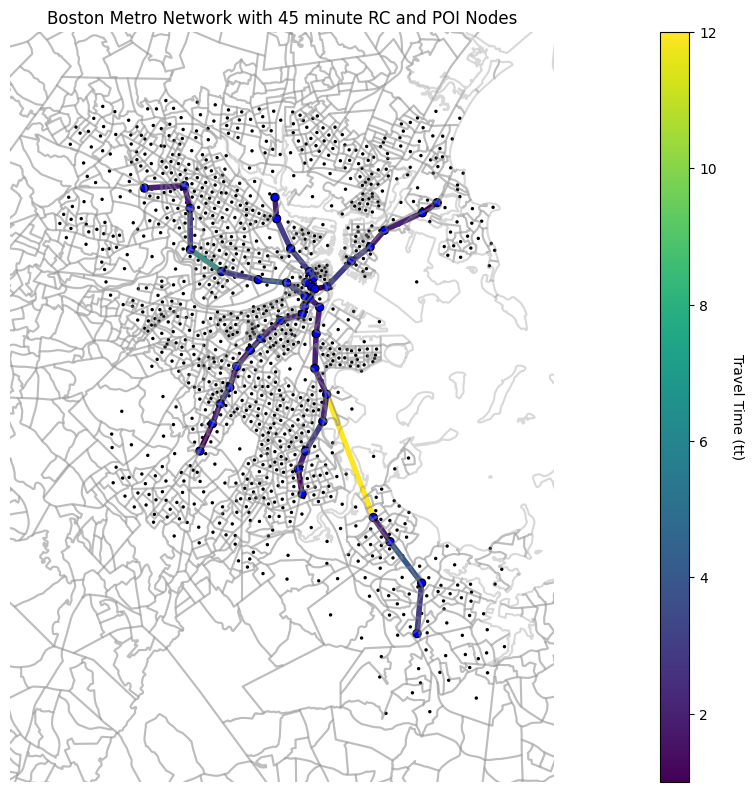

In [7]:
# Filter vertices by type
rc_nodes = g.vs.select(type='rc_node')
pt_nodes = g.vs.select(type='pt_node')

# First plot: Plot only 'rc_node' vertices
fig, ax = plt.subplots(figsize=(10, 10))

_ = ig.plot(
    g.subgraph(rc_nodes),
    target=ax,
    vertex_size=2,
    vertex_color='black',
    vertex_label=None,  # Hide vertex labels
    edge_color=None,  # Hide edges
    edge_width=0
)

# Get the extent (bounds) of the base map
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

# Second plot: Plot only 'pt_node' vertices with 'METRO' edges
metro_edges = g.es.select(type='METRO')
metro_subgraph = g.subgraph_edges(metro_edges, delete_vertices=True)
undirected_metro_graph = metro_subgraph.as_undirected(combine_edges='first')

edge_plot = ig.plot(
    undirected_metro_graph,
    target=ax,
    vertex_size=8,
    vertex_color='blue',  # Color for 'pt_node' vertices
    vertex_label=None,  # Hide vertex labels
    edge_width=4,
    arrows=False,
    arrow_size=0
)

# Normalize the 'tt' values for colormap mapping
tt_values = [edge['tt'] for edge in undirected_metro_graph.es]
norm = mcolors.Normalize(vmin=min(tt_values), vmax=max(tt_values))
cmap = plt.get_cmap('viridis')  # Use the viridis colormap

# Extract the edge collection and apply the color mapping
edge_collection = [e for e in edge_plot.get_children() if isinstance(e, ig.drawing.matplotlib.edge.EdgeCollection)][0]
colors = [cmap(norm(tt)) for tt in tt_values]
edge_collection.set_edgecolor(colors)
edge_collection.set_alpha(1)

# Add colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="4%", pad=0.1)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Dummy array for colorbar
cbar = plt.colorbar(sm, cax=cax)
cbar.set_label('Travel Time (tt)', rotation=270, labelpad=20)

# Plot census boundaries
complete_census.boundary.plot(ax=ax, edgecolor="gray", alpha=0.3)

# Ensure limits match base map extent
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

ax.set_title("Boston Metro Network with 45 minute RC and POI Nodes")

fig.savefig('boston_metro_only_map.png', dpi=400)

plt.show()

In [14]:
GEOID_20_list = [c.split('(')[-1].replace(')','') for c in rc_nodes['name']]

['250214177022',
 '250173539002',
 '250173541002',
 '250214173001',
 '250214174002',
 '250214180021',
 '250173508001',
 '250173533001',
 '250173514035',
 '250173395002',
 '250173521012',
 '250173531022',
 '250173530002',
 '250214195002',
 '250173421011',
 '250173506001',
 '250173506004',
 '250173512031',
 '250173507011',
 '250173424021',
 '250173531021',
 '250173549022',
 '250173413014',
 '250173546011',
 '250173703015',
 '250173703014',
 '250173546022',
 '250173541001',
 '250173549021',
 '250173391012',
 '250173423022',
 '250173521013',
 '250173567031',
 '250173398032',
 '250173398031',
 '250173510023',
 '250173703012',
 '250173703022',
 '250173510022',
 '250173510013',
 '250173594005',
 '250173510011',
 '250173510021',
 '250173594004',
 '250173502023',
 '250173502012',
 '250173502011',
 '250173530001',
 '250173567044',
 '250173515004',
 '250173425012',
 '250173423023',
 '250173422014',
 '250173422022',
 '250173424023',
 '250173549013',
 '250173567041',
 '250173511011',
 '250173501081

In [45]:
g_transit.vs[0]

igraph.Vertex(<igraph.Graph object at 0x7761457ba240>, 0, {'id': 2871.0, 'x': -71.141584, 'y': 42.395752, 'uniqueagencyid': 'mbta', 'routetype': 3.0, 'stopid': '141', 'name': 'Alewife', 'color': 'BLUE', 'type': 'pt_node'})

In [66]:
complete_census['geometry'].head(10)

0    POLYGON ((-71.21504 41.95606, -71.21588 41.955...
1    POLYGON ((-71.32359 41.96661, -71.32346 41.966...
2    POLYGON ((-71.31808 41.97878, -71.31809 41.978...
3    POLYGON ((-71.10352 42.07167, -71.10348 42.070...
4    POLYGON ((-71.08545 41.95025, -71.08559 41.949...
5    POLYGON ((-71.32520 41.98671, -71.32556 41.986...
6    POLYGON ((-70.98119 42.25867, -70.98134 42.258...
7    POLYGON ((-71.11980 42.51794, -71.11975 42.517...
8    POLYGON ((-71.11733 42.36919, -71.11717 42.369...
9    POLYGON ((-71.12750 42.38041, -71.12729 42.380...
Name: geometry, dtype: geometry

In [70]:
g_transit.vs[10]

igraph.Vertex(<igraph.Graph object at 0x7761457ba240>, 10, {'id': 2906.0, 'x': -71.071505, 'y': 42.361187, 'uniqueagencyid': 'mbta', 'routetype': 1.0, 'stopid': '70073', 'name': 'Charles/MGH', 'color': 'BLUE', 'type': 'pt_node'})

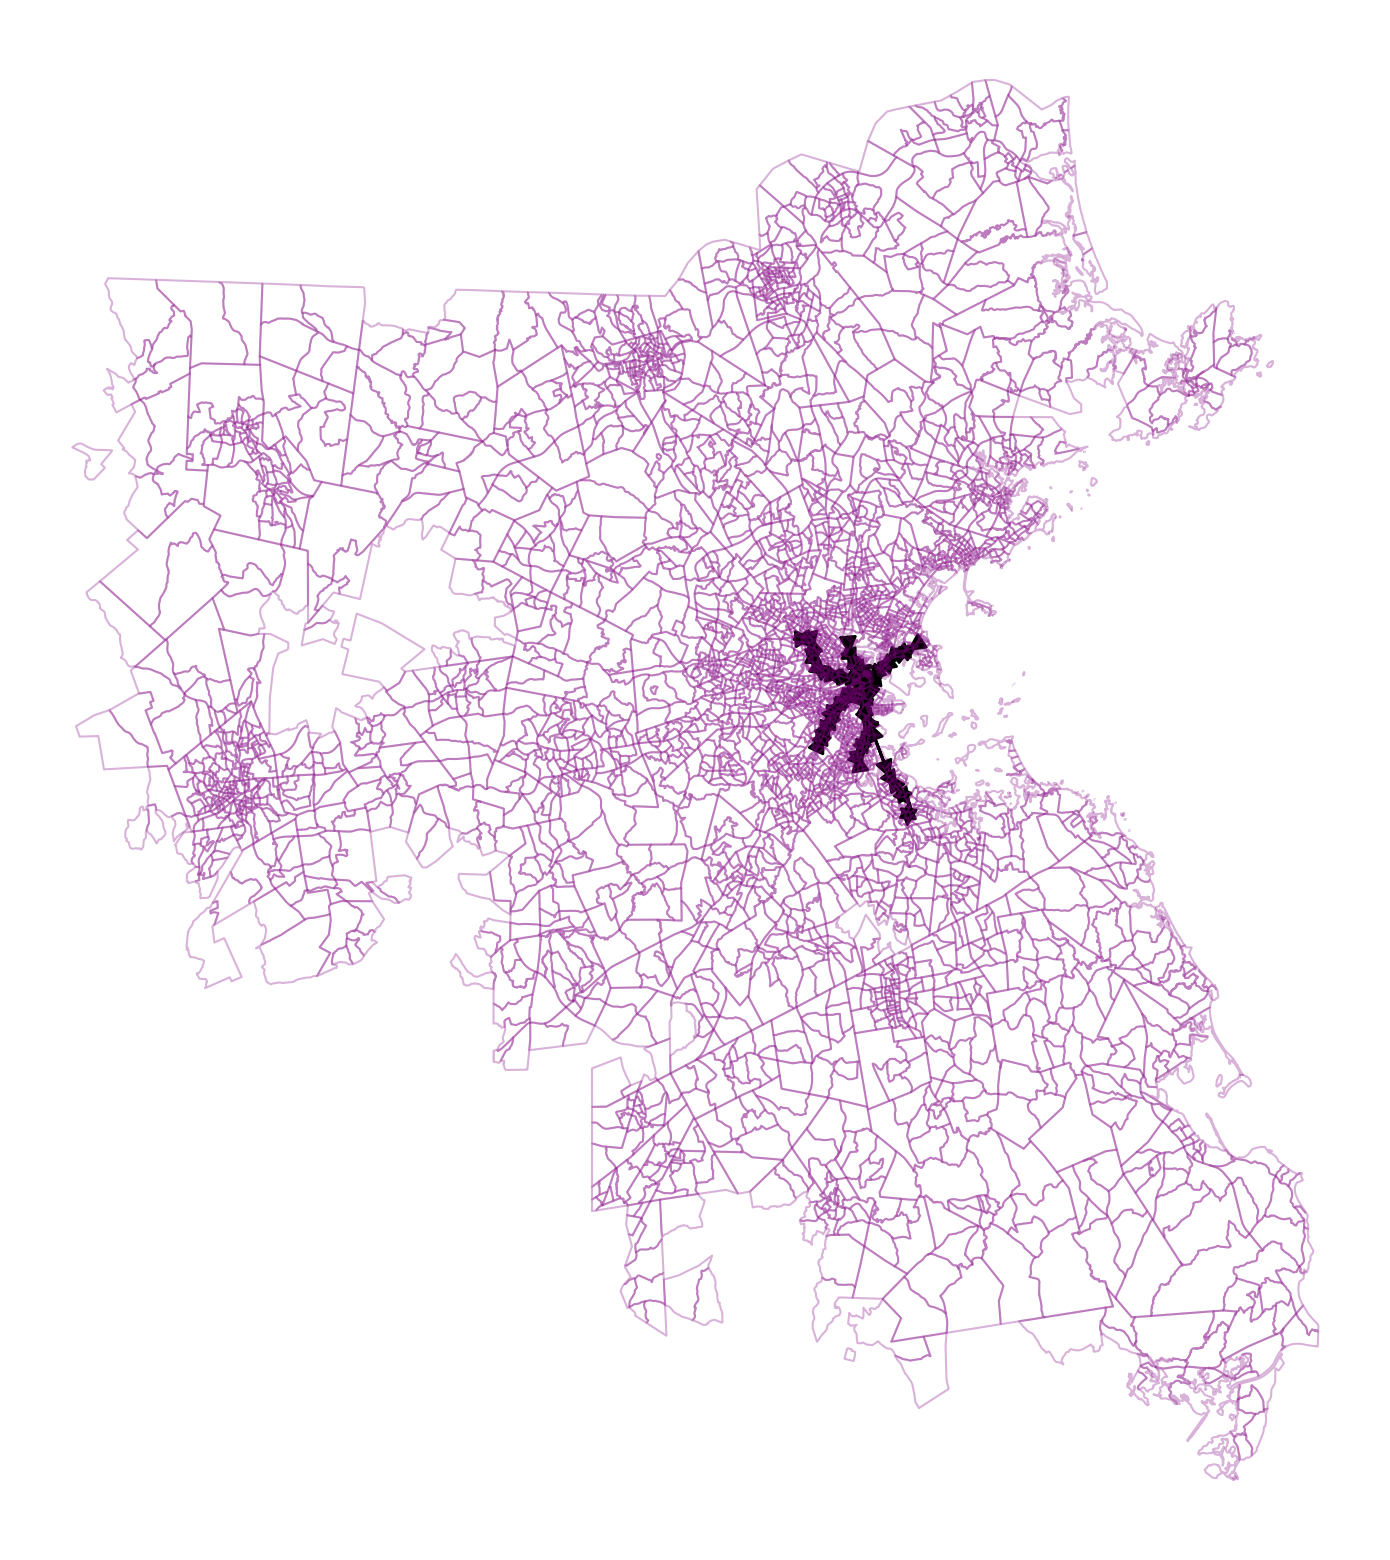

In [77]:
fig, ax = plt.subplots(1, 1, figsize=(20, 20))

# Plot the base map
base = complete_census.boundary.plot(ax=ax, edgecolor="purple", alpha=0.3)

# Get the extent (bounds) of the base map
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

# Overlay the graph on the base map
_ = ig.plot(
    g_transit,
    target=base,
    edge_curved=False,
    vertex_color=[(0, 0, 0, 0.1)],
    vertex_size=0.2,
    margin=20,  # Provide a margin for better spacing
)

# Ensure limits match base map extent
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

plt.show()

In [4]:
xmin

NameError: name 'xmin' is not defined